In [18]:
import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
stockcode ='SBIN'

ts1 = str(int(datetime.datetime(2020, 7, 20).timestamp())) 
ts2 = str(int(datetime.datetime(2020, 7, 25).timestamp()))

#interval = '1d'
interval = '1wk'
#interval = '1mo'

events = 'history'
#events = 'div'
#events = 'split'

url = 'https://query1.finance.yahoo.com/v7/finance/download/'\
      + stockcode + '.NS?period1=' + ts1 + '&period2=' + ts2 + '&interval='\
      + interval + '&events=' + events

print(url)
print (ts1, ts2)

In [ ]:
try:
    stockdata = pd.read_csv(url)
    print(stockdata)
except:
    print("Not able to fetch value for code : "+stockcode)
    print("Either stock code is not correct or could be connectivity issue..")

In [6]:
FileLocation=r'C:\Users\23132668\PythonForDataAnalytics\PersonalFinanceData'
FileName='NIftyAuto_List.csv'
Stockslist=pd.read_csv(os.path.join(FileLocation,FileName))

In [13]:
Stockslist

,Company Name,Industry,Symbol,Series,ISIN Code
0,Amara Raja Batteries Ltd.,AUTOMOBILE,AMARAJABAT.NS,EQ,INE885A01032
1,Ashok Leyland Ltd.,AUTOMOBILE,ASHOKLEY.NS,EQ,INE208A01029
2,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO.NS,EQ,INE917I01010
3,Balkrishna Industries Ltd.,AUTOMOBILE,BALKRISIND.NS,EQ,INE787D01026
4,Bharat Forge Ltd.,INDUSTRIAL MANUFACTURING,BHARATFORG.NS,EQ,INE465A01025
5,Bosch Ltd.,AUTOMOBILE,BOSCHLTD.NS,EQ,INE323A01026
6,Eicher Motors Ltd.,AUTOMOBILE,EICHERMOT.NS,EQ,INE066A01021
7,Exide Industries Ltd.,AUTOMOBILE,EXIDEIND.NS,EQ,INE302A01020
8,Hero MotoCorp Ltd.,AUTOMOBILE,HEROMOTOCO.NS,EQ,INE158A01026
9,MRF Ltd.,AUTOMOBILE,MRF.NS,EQ,INE883A01011


In [ ]:
!pip install yfinance

[*********************100%***********************]  15 of 15 completed
            AMARAJABAT.NS  ASHOKLEY.NS  BAJAJ-AUTO.NS  BALKRISIND.NS  \
Date                                                                   
2021-01-01     919.831055    99.099998    3481.250000    1637.139404   
2021-01-04     960.301453   104.050003    3522.449951    1669.690796   
2021-01-05     979.542297   104.750000    3492.649902    1676.370483   
2021-01-06     973.128723   105.099998    3462.699951    1674.227051   
2021-01-07     981.829346   111.050003    3437.949951    1662.661987   

            BHARATFORG.NS   BOSCHLTD.NS  EICHERMOT.NS  EXIDEIND.NS  \
Date                                                                 
2021-01-01     538.099976  12986.049805   2542.699951   189.478622   
2021-01-04     552.599976  13334.299805   2655.699951   194.429718   
2021-01-05     556.549988  13433.500000   2674.899902   194.182159   
2021-01-06     548.299988  13302.900391   2645.350098   191.904648   
2021

NameError: name 'plt' is not defined

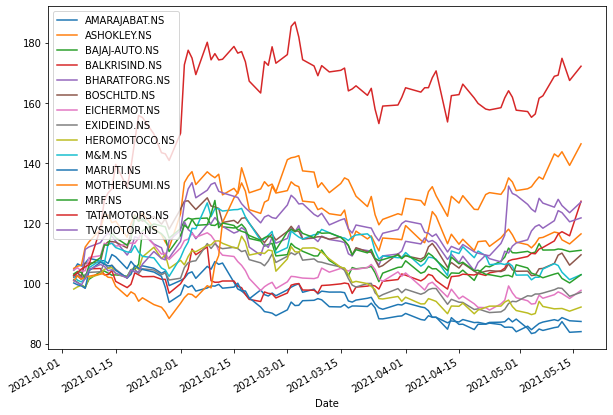

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
#tickers_list = ['M&M.NS', 'TATAMOTORS.NS', 'MARUTI.NS', 'ASHOKLEY.NS', 'EVEREADY.NS', 'MOTHERSUMI.NS','TATACOMM.NS']
tickers_list=Stockslist['Symbol'].to_list()
# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2021-1-1')['Adj Close']
data1 = yf.download(tickers_list,'2020-1-1')['Close'].reset_index()
# Print first 5 rows of the data
print(data.head())

# Plot all the close prices
(((data.pct_change()+1).cumprod())*100).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [15]:
def StockSelection(stockdf,stockname,low,high):
    df=pd.DataFrame()
    df['Close Price']=stockdf[stockname]
    # create 20 days simple moving average column
    df['LOW_SMA'] = df['Close Price'].rolling(window = low, min_periods = 1).mean()
    # create 50 days simple moving average column
    df['HIGH_SMA'] = df['Close Price'].rolling(window = high, min_periods = 1).mean()
    df['Signal'] = 0.0
    df['Signal'] = np.where(df['LOW_SMA'] > df['HIGH_SMA'], 1.0, 0.0)
    df['Position'] = df['Signal'].diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    df['Close Price'].plot(color = 'k', label= 'Close Price') 
    df['LOW_SMA'].plot(color = 'b',label = '20-day SMA') 
    df['HIGH_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot 'buy' signals
    plt.plot(df[df['Position'] == 1].index, 
             df['LOW_SMA'][df['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot 'sell' signals
    plt.plot(df[df['Position'] == -1].index, 
             df['LOW_SMA'][df['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    TITLE='Stock Analysis for '+str(stockname.split('.')[0])+' Period : From'+str(data1['Date'].min().strftime('%d-%b-%Y'))+' To '+str(data1['Date'].max().strftime('%d-%b-%Y'))
    plt.title(TITLE, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    return df.loc[df['Position']!=0,:]

In [17]:
data1 = yf.download(tickers_list,'2020-1-1')['Close'].reset_index()
for stock in tickers_list:
    df=StockSelection(data1,stock,10,50)

[*********************100%***********************]  15 of 15 completed


NameError: name 'plt' is not defined

In [55]:
df['Profit']=-1*df['Close Price']*df['Position']

,Close Price,LOW_SMA,HIGH_SMA,Signal,Position,Profit
0,81.050003,81.050003,81.050003,0.0,NaN,NaN
10,82.500000,81.994999,81.909090,1.0,1.0,-1.449997
11,83.550003,81.949999,82.045833,0.0,-1.0,-1.050003
13,84.800003,82.425000,82.382143,1.0,1.0,-1.250000
26,80.949997,82.480000,82.850000,0.0,-1.0,3.850006
103,45.750000,45.030000,44.921000,1.0,1.0,35.199997
146,49.599998,50.245000,50.292000,0.0,-1.0,-3.849998
153,61.099998,51.420000,51.284000,1.0,1.0,-11.500000
